# Employee Data Insights

This notebook presents a **mini exploratory data analysis (EDA)** of synthetic employee records.  
The goal is to demonstrate practical skills in **data cleaning**, **grouping**, and **aggregation** using Python and pandas.

It also serves as a reusable template for EDA on real-world datasets.  
Markdown cells are used throughout to explain the code, guide the reader, and summarize the key findings at the end.


In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

The data are synthetic and embedded on the notebook. The loading takes place using StringIO.

In [2]:
csv_data = StringIO("""
id,name,department,age,salary,start_date,gender
1,Alice,HR,30,50000,2015-03-01,F
2,Bob,IT,45,80000,2012-07-15,M
3,Charlie,Finance,,70000,2018-11-30,M
4,Diana,HR,38,65000,2013-06-20,F
5,Evan,IT,29,,2020-01-10,M
6,Fiona,Finance,41,72000,2010-12-01,F
7,George,IT,34,69000,2017-08-22,M
""")

In [3]:
df = pd.read_csv(csv_data)

1. Initial inspection of the dataset

In [4]:
df.head()

,id,name,department,age,salary,start_date,gender
0,1,Alice,HR,30.0,50000.0,2015-03-01,F
1,2,Bob,IT,45.0,80000.0,2012-07-15,M
2,3,Charlie,Finance,NaN,70000.0,2018-11-30,M
3,4,Diana,HR,38.0,65000.0,2013-06-20,F
4,5,Evan,IT,29.0,NaN,2020-01-10,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7 non-null      int64  
 1   name        7 non-null      object 
 2   department  7 non-null      object 
 3   age         6 non-null      float64
 4   salary      6 non-null      float64
 5   start_date  7 non-null      object 
 6   gender      7 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 524.0+ bytes


In [6]:
df.shape

(7, 7)

In [7]:
df.describe()

,id,age,salary
count,7.000000,6.000000,6.000000
mean,4.000000,36.166667,67666.666667
std,2.160247,6.306082,9973.297683
min,1.000000,29.000000,50000.000000
25%,2.500000,31.000000,66000.000000
50%,4.000000,36.000000,69500.000000
75%,5.500000,40.250000,71500.000000
max,7.000000,45.000000,80000.000000


In [8]:
# What is the number of null values?

df.isnull().sum()


,0
id,0
name,0
department,0
age,1
salary,1
start_date,0
gender,0


In [9]:
df['salary'].mean()

np.float64(67666.66666666667)

In [10]:
df[df["department"] == "IT"]

,id,name,department,age,salary,start_date,gender
1,2,Bob,IT,45.0,80000.0,2012-07-15,M
4,5,Evan,IT,29.0,NaN,2020-01-10,M
6,7,George,IT,34.0,69000.0,2017-08-22,M


In [11]:
df["department"].value_counts()

,count
department,
IT,3
HR,2
Finance,2


In [12]:
df[df["gender"] == "F"]

,id,name,department,age,salary,start_date,gender
0,1,Alice,HR,30.0,50000.0,2015-03-01,F
3,4,Diana,HR,38.0,65000.0,2013-06-20,F
5,6,Fiona,Finance,41.0,72000.0,2010-12-01,F


In [13]:
# What is the number of female/male employees
# alternative answer using value_counts()

df["gender"].value_counts()

,count
gender,
M,4
F,3


In [14]:
df[df["age"] > 35]

,id,name,department,age,salary,start_date,gender
1,2,Bob,IT,45.0,80000.0,2012-07-15,M
3,4,Diana,HR,38.0,65000.0,2013-06-20,F
5,6,Fiona,Finance,41.0,72000.0,2010-12-01,F


In [15]:
df_older = df[df["age"] > 35]
df_older[df_older["gender"] == "F"]

,id,name,department,age,salary,start_date,gender
3,4,Diana,HR,38.0,65000.0,2013-06-20,F
5,6,Fiona,Finance,41.0,72000.0,2010-12-01,F


In [16]:
df[(df["gender"] == "F") & (df["age"] > 35)]

,id,name,department,age,salary,start_date,gender
3,4,Diana,HR,38.0,65000.0,2013-06-20,F
5,6,Fiona,Finance,41.0,72000.0,2010-12-01,F


2. Data cleaning:

In [17]:
# null values before data cleaning

df.isnull().sum()

,0
id,0
name,0
department,0
age,1
salary,1
start_date,0
gender,0


Cleaning the data:

In [18]:
# Option 1: drop null values and check the data shape again
# store results in a new data frame for data integrity

df_dropped = df.dropna()
df_dropped.shape

(5, 7)

In [19]:
df_dropped

,id,name,department,age,salary,start_date,gender
0,1,Alice,HR,30.0,50000.0,2015-03-01,F
1,2,Bob,IT,45.0,80000.0,2012-07-15,M
3,4,Diana,HR,38.0,65000.0,2013-06-20,F
5,6,Fiona,Finance,41.0,72000.0,2010-12-01,F
6,7,George,IT,34.0,69000.0,2017-08-22,M


In [45]:
# Dropping rows with missing values reduced the dataset from 7 to 5 rows.
# Given the very small size and the fact this is illustrative synthetic data,
# we chose imputation (option 2 below) to retain all records for analysis.


In [48]:
# Option 2: imputation of the missing values (for "age" and "salary") with the relevant mean values
# Chosen instead of dropping rows to preserve all records

df["age"].fillna(df["age"].mean(), inplace = True) # replacing the missing value in the "age" column with the relevant mean value

/tmp/ipython-input-3531365978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].mean(), inplace = True) # replacing the missing value in the "age" column with the relevant mean value


In [49]:
df["salary"].fillna(6000, inplace = True) # replacing the missing value in the "salary" column with the relevant mean value

/tmp/ipython-input-3731376310.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["salary"].fillna(6000, inplace = True) # replacing the missing value in the "salary" column with the relevant mean value


In [50]:
# Null values after cleaning the data, using imputation (preferred option 2)

df.isnull().sum()

,0
id,0
name,0
department,0
age,0
salary,0
start_date,0
gender,0


3. Exploratory Analysis:

In [23]:
# what is the average salary in the IT department?

df[df["department"] == "IT"]["salary"].mean()

np.float64(51666.666666666664)

In [24]:
# what is the average salary per department?
# results are not sorted here, they appear alphabetically by department

df.groupby("department")["salary"].mean()

,salary
department,
Finance,71000.000000
HR,57500.000000
IT,51666.666667


In [25]:
# what is the average salary per department? Sort it in descending order.

df.groupby("department")["salary"].mean().sort_values(ascending=False)


,salary
department,
Finance,71000.000000
HR,57500.000000
IT,51666.666667


In [26]:
df.groupby("gender")[["age", "salary"]].mean()

,age,salary
gender,,
F,36.333333,62333.333333
M,36.041667,56250.000000


In [27]:
df.groupby("gender")[["age", "salary"]].mean().sort_values("age", ascending=True)


,age,salary
gender,,
M,36.041667,56250.000000
F,36.333333,62333.333333


In [28]:
df.groupby("gender")[["age", "salary"]].mean().reset_index()

,gender,age,salary
0,F,36.333333,62333.333333
1,M,36.041667,56250.000000


In [29]:
# how many employees are there in each department?

df["department"].value_counts()

,count
department,
IT,3
HR,2
Finance,2


In [30]:
# counts id (employee) per department

df.groupby("department")["id"].count()

,id
department,
Finance,2
HR,2
IT,3


In [31]:
df.groupby("department")[["salary", "age"]].agg(["count", "min", "max", "mean"])

salary                                   age                   \
            count      min      max          mean count        min   max   
department                                                                 
Finance         2  70000.0  72000.0  71000.000000     2  36.166667  41.0   
HR              2  50000.0  65000.0  57500.000000     2  30.000000  38.0   
IT              3   6000.0  80000.0  51666.666667     3  29.000000  45.0   

                       
                 mean  
department             
Finance     38.583333  
HR          34.000000  
IT          36.000000

In [32]:
df.groupby("department")[["age", "salary"]].agg(["count", "mean", "max", "min"]).round(0)

age                   salary                           
           count  mean   max   min  count     mean      max      min
department                                                          
Finance        2  39.0  41.0  36.0      2  71000.0  72000.0  70000.0
HR             2  34.0  38.0  30.0      2  57500.0  65000.0  50000.0
IT             3  36.0  45.0  29.0      3  51667.0  80000.0   6000.0

In [33]:
df.to_csv("cleaned_employees.csv", index = False)

In [34]:
# downloads the cleaned dataset

from google.colab import files
files.download("cleaned_employees.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# what is the average employee age per department? Sort in descending order

df.groupby("department")["age"].mean().sort_values(ascending=False)

,age
department,
Finance,38.583333
IT,36.000000
HR,34.000000


In [36]:
# what is the gender distribution across departments?

df.groupby(["department", "gender"])["id"].count()

department  gender
Finance     F         1
            M         1
HR          F         2
IT          M         3
Name: id, dtype: int64

In [37]:
df.groupby(["department", "gender"]).size().unstack()

# NaN values show up due to IT department having no female employees and HR department having no male employees

gender,F,M
department,,
Finance,1.0,1.0
HR,2.0,NaN
IT,NaN,3.0


In [38]:
df.groupby("department").agg({
    "id": "count",
    "age": "mean",
    "salary": ["mean", "min", "max"]})

id        age        salary                  
           count       mean          mean      min      max
department                                                 
Finance        2  38.583333  71000.000000  70000.0  72000.0
HR             2  34.000000  57500.000000  50000.0  65000.0
IT             3  36.000000  51666.666667   6000.0  80000.0

In [39]:
# below the summary df is presented again but this time id is changed to employee count

summary = df.groupby("department").agg({
    "id": "count",
    "age": "mean",
    "salary": ["mean", "min", "max"]}).rename(columns={"id": "employee_count"})

summary.round(0)

employee_count   age   salary                  
                    count  mean     mean      min      max
department                                                
Finance                 2  39.0  71000.0  70000.0  72000.0
HR                      2  34.0  57500.0  50000.0  65000.0
IT                      3  36.0  51667.0   6000.0  80000.0

In [40]:
summary.shape

(3, 5)

4. Visualizations:

they will provide visual summaries of the analysis and solidify discovered insights

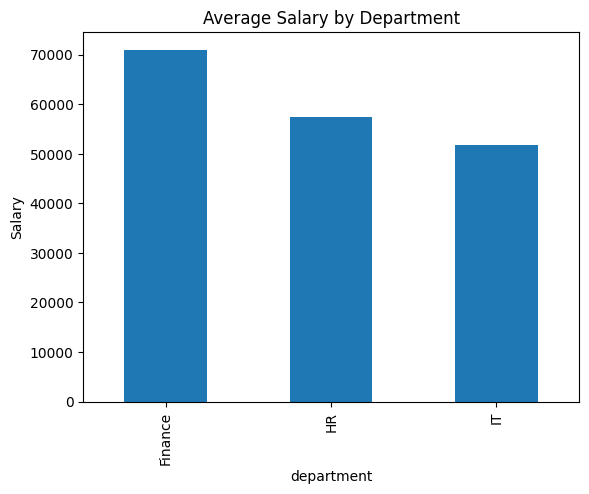

In [51]:
# a bar chart showing the average salary by department
# Finance department leads in average salary, followed by HR and IT

df.groupby("department")["salary"].mean().plot(kind="bar", title="Average Salary by Department")
plt.ylabel("Salary")
plt.show()

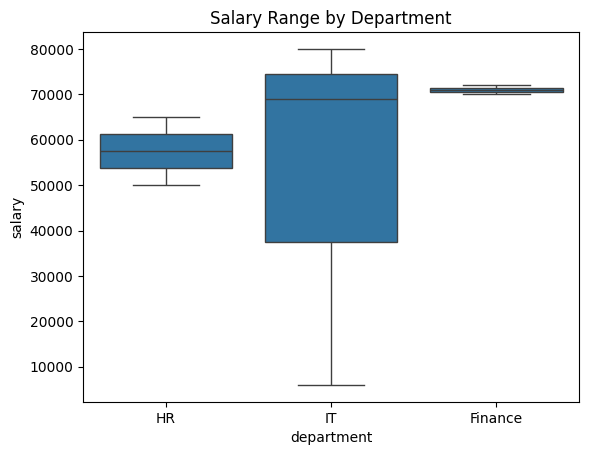

In [53]:
# box plot showing the range of salary by department

# IT department shows the widest salary dispersion, followed by HR.
# Finance salaries appear more compact and consistent across employees.

sns.boxplot(x="department", y="salary", data=df)
plt.title("Salary Range by Department")
plt.show()

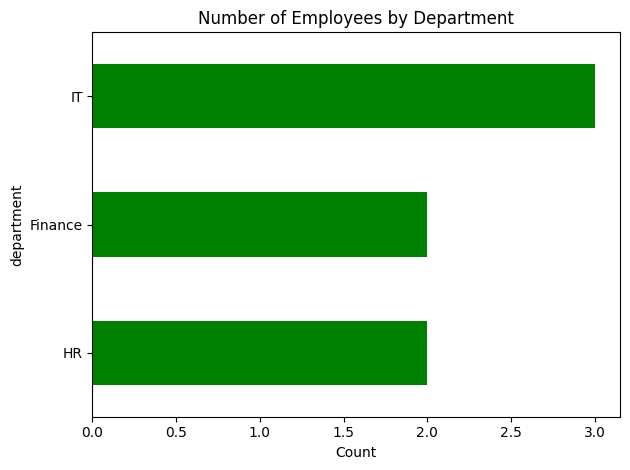

In [52]:
# horizontal bar chart showing number of employees

df["department"].value_counts().sort_values().plot(
    kind="barh",
    title="Number of Employees by Department",
    color="green"
)
plt.xlabel("Count")
plt.tight_layout()
plt.show()

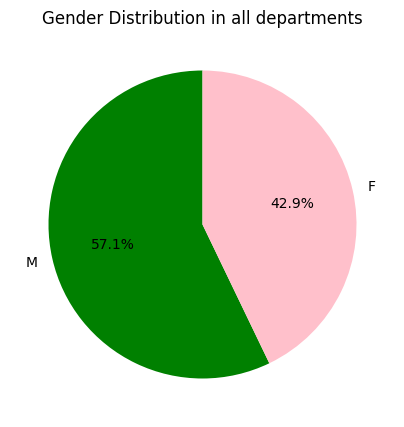

In [44]:
# pie chart showing gender distribution, all departments combined

df["gender"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    title="Gender Distribution in all departments",
    figsize=(5,5),
    colors=["green", "pink"]
)
plt.ylabel("")  # Hide y-label
plt.show()

###  Key Takeaways

- **Finance** employees have the highest average salary and are the oldest on average.
- **IT** is the largest department by headcount but has the lowest average salary.
- **HR** and **IT** are staffed by a single gender, while **Finance** is gender-balanced.
- Missing `age` and `salary` values were imputed to preserve data integrity, given the small and synthetic nature of the dataset.
- The **IT** department exhibits the widest variation in salaries, followed by **HR**, while **Finance** salaries appear more tightly clustered.

